<h1>Tabla de Contenidos<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#MÁQUINAS-DE-VECTOR-SOPORTE-(SVM)" data-toc-modified-id="MÁQUINAS-DE-VECTOR-SOPORTE-(SVM)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><strong>MÁQUINAS DE VECTOR SOPORTE (SVM)</strong></a></span></li><li><span><a href="#CLASIFICACIÓN" data-toc-modified-id="CLASIFICACIÓN-2"><span class="toc-item-num">2&nbsp;&nbsp;</span><strong>CLASIFICACIÓN</strong></a></span><ul class="toc-item"><li><span><a href="#Carga-de-datos" data-toc-modified-id="Carga-de-datos-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Carga de datos</a></span><ul class="toc-item"><li><span><a href="#Estadísticos" data-toc-modified-id="Estadísticos-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Estadísticos</a></span></li><li><span><a href="#Distribución-de-la-variable-respuesta-&quot;Purchase&quot;" data-toc-modified-id="Distribución-de-la-variable-respuesta-&quot;Purchase&quot;-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Distribución de la variable respuesta "Purchase"</a></span></li></ul></li><li><span><a href="#División-entrenamiento-test" data-toc-modified-id="División-entrenamiento-test-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>División entrenamiento-test</a></span></li><li><span><a href="#Codificación" data-toc-modified-id="Codificación-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Codificación</a></span></li><li><span><a href="#Estandarización" data-toc-modified-id="Estandarización-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Estandarización</a></span></li><li><span><a href="#Máquina-de-vector-soporte-(kernel=lineal)" data-toc-modified-id="Máquina-de-vector-soporte-(kernel=lineal)-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span><strong>Máquina de vector soporte (kernel=lineal)</strong></a></span><ul class="toc-item"><li><span><a href="#Búsqueda-de-hiperparámetros-y-ajuste" data-toc-modified-id="Búsqueda-de-hiperparámetros-y-ajuste-2.5.1"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span>Búsqueda de hiperparámetros y ajuste</a></span></li><li><span><a href="#Evaluación" data-toc-modified-id="Evaluación-2.5.2"><span class="toc-item-num">2.5.2&nbsp;&nbsp;</span>Evaluación</a></span></li></ul></li><li><span><a href="#Máquina-de-vector-soporte-(kernel=polinómico)" data-toc-modified-id="Máquina-de-vector-soporte-(kernel=polinómico)-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span><strong>Máquina de vector soporte (kernel=polinómico)</strong></a></span><ul class="toc-item"><li><span><a href="#Búsqueda-de-hiperparámetros-y-ajuste" data-toc-modified-id="Búsqueda-de-hiperparámetros-y-ajuste-2.6.1"><span class="toc-item-num">2.6.1&nbsp;&nbsp;</span>Búsqueda de hiperparámetros y ajuste</a></span></li><li><span><a href="#Evaluación" data-toc-modified-id="Evaluación-2.6.2"><span class="toc-item-num">2.6.2&nbsp;&nbsp;</span>Evaluación</a></span></li></ul></li><li><span><a href="#Máquina-de-vector-soporte-(kernel=radial)" data-toc-modified-id="Máquina-de-vector-soporte-(kernel=radial)-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span><strong>Máquina de vector soporte (kernel=radial)</strong></a></span><ul class="toc-item"><li><span><a href="#Búsqueda-de-hiperparámetros-y-ajuste" data-toc-modified-id="Búsqueda-de-hiperparámetros-y-ajuste-2.7.1"><span class="toc-item-num">2.7.1&nbsp;&nbsp;</span>Búsqueda de hiperparámetros y ajuste</a></span></li><li><span><a href="#Evaluación" data-toc-modified-id="Evaluación-2.7.2"><span class="toc-item-num">2.7.2&nbsp;&nbsp;</span>Evaluación</a></span></li></ul></li></ul></li></ul></div>

# **MÁQUINAS DE VECTOR SOPORTE (SVM)**

Cristina Gil Martínez (cristina_gil_m@hotmail.com)

Abril 2020

Los ejemplos de este documento son la versión en Python de los explicados en mi publicación en RPubs [Máquinas de vector soporte](https://rpubs.com/Cristina_Gil/396625), donde se recoge además la explicación teórica de los métodos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing, model_selection 
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, mean_squared_error, make_scorer, plot_confusion_matrix, classification_report
from sklearn import metrics

Version de scikit-learn 0.22.2

In [2]:
#pd.options.mode.chained_assignment = None

# **CLASIFICACIÓN**

## Carga de datos

Se utiliza el set de datos `OJ.csv` del paquete `ISLR` de `R` para el ejemplo de clasificación.

In [3]:
# Importamos el set de datos OJ desde un CSV
datos_oj = pd.read_csv('OJ.csv')
print('Filas:', datos_oj.shape[0], 'Variables:', datos_oj.shape[1])
datos_oj.head()

Filas: 1070 Variables: 18


,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


###  Estadísticos

In [4]:
datos_oj.describe()

,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
count,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,254.381308,3.959813,1.867421,2.085411,0.051860,0.123364,0.147664,0.161682,0.565782,1.962047,1.815561,0.146486,0.059298,0.027314,0.217991,1.630841
std,15.558286,2.308984,0.101970,0.134386,0.117474,0.213834,0.354932,0.368331,0.307843,0.252697,0.143384,0.271563,0.101760,0.062232,0.107535,1.430387
min,227.000000,1.000000,1.690000,1.690000,0.000000,0.000000,0.000000,0.000000,0.000011,1.190000,1.390000,-0.670000,0.000000,0.000000,0.000000,0.000000
25%,240.000000,2.000000,1.790000,1.990000,0.000000,0.000000,0.000000,0.000000,0.325257,1.690000,1.750000,0.000000,0.000000,0.000000,0.140000,0.000000
50%,257.000000,3.000000,1.860000,2.090000,0.000000,0.000000,0.000000,0.000000,0.600000,2.090000,1.860000,0.230000,0.000000,0.000000,0.240000,2.000000
75%,268.000000,7.000000,1.990000,2.180000,0.000000,0.230000,0.000000,0.000000,0.850873,2.130000,1.890000,0.320000,0.112676,0.000000,0.300000,3.000000
max,278.000000,7.000000,2.090000,2.290000,0.500000,0.800000,1.000000,1.000000,0.999947,2.290000,2.090000,0.640000,0.402010,0.252688,0.440000,4.000000


### Distribución de la variable respuesta "Purchase"

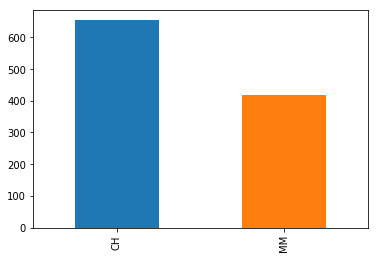

In [5]:
datos_oj['Purchase'].value_counts().plot(kind='bar')

In [6]:
# Numero y porcentaje de observaciones por clase
print(datos_oj.Purchase.value_counts())
datos_oj.Purchase.value_counts(normalize=True)*100

CH    653
MM    417
Name: Purchase, dtype: int64


CH    61.028037
MM    38.971963
Name: Purchase, dtype: float64

## División entrenamiento-test

In [7]:
# Separamos los predictores (X) de la variable respuesta (y)
X = datos_oj.loc[:, datos_oj.columns != 'Purchase']
y = datos_oj['Purchase']

# Dividimos los datos en entrenamiento (80%) y test (20%) de forma aleatoria
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=0, test_size=0.2)

## Codificación

Las variables predictoras de tipo _string_ o _factor_ (en este caso _Store7_) se codifican a tipo numérico.

In [8]:
# Codificamos la variable categorica predictora "Store7" a numerica
encoder = preprocessing.LabelEncoder()
X_train['Store7'] = encoder.fit_transform(X_train['Store7'])
X_test['Store7'] = encoder.fit_transform(X_test['Store7'])

## Estandarización

Para ajustar un modelo SVM, es importante aplicar una previa estandarización a los datos. Los parámetros para estandarizarlos se generan con la función `StandardScaler()` a partir de los datos de entrenamiento para no incluir información de los datos de test en el proceso. A continuación se aplica la estandarización tanto a los datos de entrenamiento como los de test:

In [9]:
# Estandarizamos las variables predictoras del subconjunto train y test
estandarizador = preprocessing.StandardScaler().fit(X_train)
X_train = estandarizador.transform(X_train)
X_test = estandarizador.transform(X_test)

In [11]:
# Media y std utilizado para estandarizar cada predictor
print('Media de cada predictor\n:', estandarizador.mean_, 
      "\nStd de cada predictor:\n", estandarizador.var_)

Media de cada predictor
: [2.54589953e+02 3.97196262e+00 1.86849299e+00 2.08650701e+00
 5.32476636e-02 1.20911215e-01 1.44859813e-01 1.60046729e-01
 5.74562488e-01 1.96559579e+00 1.81524533e+00 1.50350467e-01
 3.35280374e-01 5.81584953e-02 2.80259451e-02 2.18014019e-01
 1.62500000e+00] 
Std de cada predictor:
 [2.38641441e+02 5.35201764e+00 1.01716775e-02 1.77668878e-02
 1.40434246e-02 4.41501043e-02 1.23875448e-01 1.34431774e-01
 9.50908352e-02 6.25255796e-02 2.04564819e-02 7.08120267e-02
 2.22867445e-01 9.99634549e-03 3.93974127e-03 1.15100746e-02
 2.05914136e+00]


## **Máquina de vector soporte (kernel=lineal)**

Para ajustar un modelo SVM, implementaremos la clase `sklearn.svm.SVC`: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

Entre sus parámetros, encontramos:

- `C`: parámetro de penalización.
- `kernel`: especifica el tipo de kernel usado por el algoritmo (lineal, polinómico, radial, etc.).
- `degree`: grado de la función con kernel polinómico.
- `gamma`: coeficiente del kernel para ‘rbf’, ‘poly’ y ‘sigmoid’.
- `probability`: indica si se permite la estimación de probabilidades.
- `max_iter`: límite de iteraciones.
- `decision_function_shape`: permite establecer el método one-vs-one o one-vs-all.
- `random_state`: semilla para el generador de número pseudoaleatorios.

### Búsqueda de hiperparámetros y ajuste

Para ajustar un SVM con límite de clasificación lineal, aplicaremos una optimización del hiperparámetro de coste `C`:

In [12]:
from sklearn import svm

# Establecemos un grid con los valores de coste que queremos evaluar
grid_hiperparametros = {'C': [0.001, 0.01, 0.1, 0.3, 0.5, 1, 2, 3, 4, 5, 7, 10]} 

# Definimos las metricas sobre las que queremos evaluar
metricas = ['roc_auc', 'accuracy']

# Definimos la busqueda mediante 10-fold CV
busqueda_grid = GridSearchCV(estimator = svm.SVC(kernel='linear', random_state = 0), 
                             param_grid = grid_hiperparametros, 
                             cv = 10, #folds
                             scoring = metricas, 
                             refit='accuracy',
                             #return_train_score = True,
                             n_jobs = -1)


# Aplicamos la busqueda
busqueda_grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=0, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 0.3, 0.5, 1, 2, 3, 4, 5, 7,
                               10]},
             pre_dispatch='2*n_jobs', refit='accuracy',
             return_train_score=False, scoring=['roc_auc', 'accuracy'],
             verbose=0)

In [13]:
# Valores que devuelve la busqueda grid
busqueda_grid.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'params', 'split0_test_roc_auc', 'split1_test_roc_auc', 'split2_test_roc_auc', 'split3_test_roc_auc', 'split4_test_roc_auc', 'split5_test_roc_auc', 'split6_test_roc_auc', 'split7_test_roc_auc', 'split8_test_roc_auc', 'split9_test_roc_auc', 'mean_test_roc_auc', 'std_test_roc_auc', 'rank_test_roc_auc', 'split0_test_accuracy', 'split1_test_accuracy', 'split2_test_accuracy', 'split3_test_accuracy', 'split4_test_accuracy', 'split5_test_accuracy', 'split6_test_accuracy', 'split7_test_accuracy', 'split8_test_accuracy', 'split9_test_accuracy', 'mean_test_accuracy', 'std_test_accuracy', 'rank_test_accuracy'])

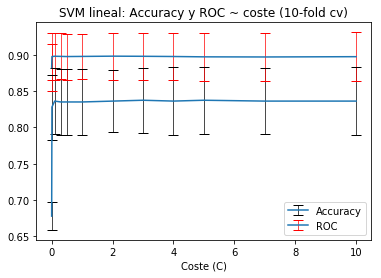

Valor de coste y grado óptimos: {'C': 3} 
Accuracy asociado +- std: 0.838 +- 0.045


In [15]:
# Almacenamos en variables los resultados de la busqueda grid
C_cv = busqueda_grid.cv_results_['param_C'].tolist()

accuracy_medio_cv = busqueda_grid.cv_results_['mean_test_accuracy'].tolist()
accuracy_std_cv = busqueda_grid.cv_results_['std_test_accuracy'].tolist()

roc_medio_cv = busqueda_grid.cv_results_['mean_test_roc_auc'].tolist()
roc_std_cv = busqueda_grid.cv_results_['std_test_roc_auc'].tolist()

# Grafico evolucion del Accuracy en funcion del coste en validacion cruzada
plt.figure()
plt.plot(x = C_cv, y = accuracy_medio_cv)
plt.errorbar(x = C_cv, 
             y = accuracy_medio_cv, 
             yerr = accuracy_std_cv, 
             ecolor = 'black', 
             elinewidth = 0.7,
             capsize = 5,
             label = 'Accuracy')
plt.errorbar(x = C_cv, 
             y = roc_medio_cv, 
             yerr = roc_std_cv, 
             ecolor = 'red', 
             elinewidth = 0.7, 
             capsize = 5,
             label = 'ROC')
plt.title("SVM lineal: Accuracy y ROC ~ coste (10-fold cv)")
plt.xlabel('Coste (C)')
#plt.ylabel('')
#plt.ylim((0, 1))
plt.legend()
plt.show()

# Mejores hiperparametros sobre los datos hold-out
print('Valor de coste y grado óptimos:', busqueda_grid.best_params_,
     '\nAccuracy asociado +- std:', round(busqueda_grid.cv_results_['mean_test_accuracy'][busqueda_grid.best_index_],3),
     '+-', round(busqueda_grid.cv_results_['std_test_accuracy'][busqueda_grid.best_index_],3))

In [16]:
# Ajustamos el modelo SVM lineal usando el valor de coste óptimo obtenido en cv
modelo_svmL = svm.SVC(kernel='linear', 
                      C = busqueda_grid.best_params_.get('C'), #C=3
                      random_state = 0) # semilla
                     
# Entrenamos el modelo con los datos de entrenamiento 
modelo_svmL.fit(X_train, y_train)

SVC(C=3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [17]:
# Nº de vectores soporte para cada clase de la variable respuesta
print(modelo_svmL.n_support_)

[173 174]


### Evaluación

Métricas en test:
               precision    recall  f1-score   support

          CH       0.83      0.86      0.84       122
          MM       0.80      0.76      0.78        92

    accuracy                           0.82       214
   macro avg       0.82      0.81      0.81       214
weighted avg       0.82      0.82      0.82       214



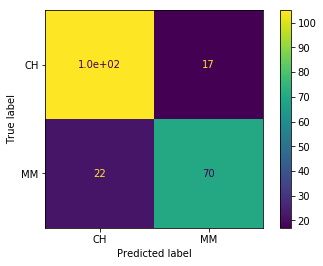

In [18]:
# TEST

# Obtenemos las predicciones del modelo sobre los datos de test
y_pred = modelo_svmL.predict(X_test)

# Metricas
print('Métricas en test:\n', classification_report(y_test, y_pred))

# Matriz de confusion (0=CH, 1=MM)
plot_confusion_matrix(modelo_svmL, X_test, y_test)

## **Máquina de vector soporte (kernel=polinómico)**

### Búsqueda de hiperparámetros y ajuste

Para ajustar un SVM con límite de clasificación no lineal y kernel polinómico, aplicaremos una optimización del hiperparámetro de coste `C` y grado o `degree`:

In [19]:
# Establecemos un grid con los valores de coste que queremos evaluar
grid_hiperparametros = {'C': [0.001, 0.01, 0.1, 0.3, 0.5, 1, 2, 3, 4, 5, 7, 10],
                        'degree': [2, 3]} 

# Definimos las metricas sobre las que queremos evaluar
metricas = ['roc_auc', 'accuracy']

# Definimos la busqueda mediante 10-fold CV
busqueda_grid = GridSearchCV(estimator = svm.SVC(kernel='poly', random_state = 0), 
                             param_grid = grid_hiperparametros, 
                             cv = 10, #folds
                             scoring = metricas, 
                             refit = 'accuracy',
                             #return_train_score = True,
                             n_jobs = -1)


# Aplicamos la busqueda
busqueda_grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='poly', max_iter=-1,
                           probability=False, random_state=0, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 0.3, 0.5, 1, 2, 3, 4, 5, 7,
                               10],
                         'degree': [2, 3]},
             pre_dispatch='2*n_jobs', refit='accuracy',
             return_train_score=False, scoring=['roc_auc', 'accuracy'],
             verbose=0)

In [20]:
# Valores que devuelve la busqueda grid
busqueda_grid.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_degree', 'params', 'split0_test_roc_auc', 'split1_test_roc_auc', 'split2_test_roc_auc', 'split3_test_roc_auc', 'split4_test_roc_auc', 'split5_test_roc_auc', 'split6_test_roc_auc', 'split7_test_roc_auc', 'split8_test_roc_auc', 'split9_test_roc_auc', 'mean_test_roc_auc', 'std_test_roc_auc', 'rank_test_roc_auc', 'split0_test_accuracy', 'split1_test_accuracy', 'split2_test_accuracy', 'split3_test_accuracy', 'split4_test_accuracy', 'split5_test_accuracy', 'split6_test_accuracy', 'split7_test_accuracy', 'split8_test_accuracy', 'split9_test_accuracy', 'mean_test_accuracy', 'std_test_accuracy', 'rank_test_accuracy'])

In [21]:
# Almacenamos en variables los resultados de la busqueda grid
C_cv = busqueda_grid.cv_results_['param_C'].tolist()
degree_cv = busqueda_grid.cv_results_['param_degree'].tolist()

accuracy_medio_cv = busqueda_grid.cv_results_['mean_test_accuracy'].tolist()
accuracy_std_cv = busqueda_grid.cv_results_['std_test_accuracy'].tolist()

# Generamos un data frame con los resultados de la validacion cruzada
df_resultados_cv = pd.DataFrame({'C': C_cv, 
                                 'degree': degree_cv, 
                                 'mean_accuracy': accuracy_medio_cv,
                                 'std_accuracy': accuracy_std_cv})
                                 
df_resultados_cv

,C,degree,mean_accuracy,std_accuracy
0,0.001,2,0.620342,0.004247
1,0.001,3,0.620342,0.004247
2,0.010,2,0.620342,0.004247
3,0.010,3,0.639111,0.023869
4,0.100,2,0.677770,0.052241
5,0.100,3,0.730192,0.042921
6,0.300,2,0.729152,0.043166
7,0.300,3,0.795595,0.043321
8,0.500,2,0.759466,0.043004
9,0.500,3,0.803653,0.045308


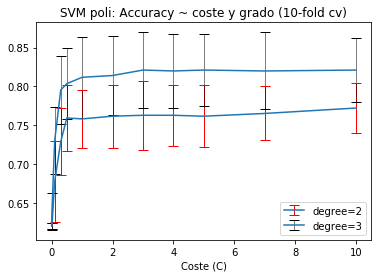

Valor de coste y grado óptimos: {'C': 5, 'degree': 3} 
Accuracy asociado +- std: 0.821 +- 0.046


In [22]:
# Graficamos los resultados de la busqueda grid
plt.figure()
plt.plot(x = df_resultados_cv[df_resultados_cv['degree']==2]['C'], 
         y = df_resultados_cv[df_resultados_cv['degree']==2]['mean_accuracy'])
plt.errorbar(x = df_resultados_cv[df_resultados_cv['degree']==2]['C'],
             y = df_resultados_cv[df_resultados_cv['degree']==2]['mean_accuracy'], 
             yerr = df_resultados_cv[df_resultados_cv['degree']==2]['std_accuracy'],
             ecolor = 'red',
             elinewidth=1,
             label = 'degree=2',
             capsize=5)
plt.plot(x = df_resultados_cv[df_resultados_cv['degree']==3]['C'], 
         y = df_resultados_cv[df_resultados_cv['degree']==3]['mean_accuracy'])
plt.errorbar(x = df_resultados_cv[df_resultados_cv['degree']==3]['C'],
             y = df_resultados_cv[df_resultados_cv['degree']==3]['mean_accuracy'], 
             yerr = df_resultados_cv[df_resultados_cv['degree']==3]['std_accuracy'],
             ecolor = 'black', 
             elinewidth = 0.5,
             label = 'degree=3',
             capsize=5)
plt.title("SVM poli: Accuracy ~ coste y grado (10-fold cv)")
plt.xlabel('Coste (C)')
#plt.ylabel('')
plt.legend()
plt.show()

# Mejores hiperparametros sobre los datos hold-out
print('Valor de coste y grado óptimos:', busqueda_grid.best_params_,
     '\nAccuracy asociado +- std:', round(busqueda_grid.cv_results_['mean_test_accuracy'][busqueda_grid.best_index_],3),
     '+-', round(busqueda_grid.cv_results_['std_test_accuracy'][busqueda_grid.best_index_],3))

In [23]:
# Ajustamos el modelo SVM lineal usando el valor de coste óptimo obtenido en cv
modelo_svmP = svm.SVC(kernel = 'poly', 
                      C = busqueda_grid.best_params_.get('C'), #C=5
                      degree = busqueda_grid.best_params_.get('degree'), #degree=3
                      random_state = 0) # semilla
                     
# Entrenamos el modelo con los datos de entrenamiento 
modelo_svmP.fit(X_train, y_train)

SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [24]:
# Nº de vectores soporte para cada clase de la variable respuesta
print(modelo_svmP.n_support_)

[181 182]


### Evaluación

Métricas en test:
               precision    recall  f1-score   support

          CH       0.81      0.83      0.82       122
          MM       0.77      0.75      0.76        92

    accuracy                           0.79       214
   macro avg       0.79      0.79      0.79       214
weighted avg       0.79      0.79      0.79       214



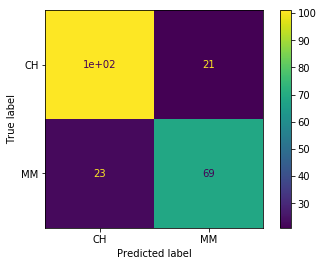

In [25]:
# TEST

# Obtenemos las predicciones del modelo sobre los datos de test
y_pred = modelo_svmP.predict(X_test)

# Metricas
print('Métricas en test:\n', classification_report(y_test, y_pred))

# Matriz de confusion (0=CH, 1=MM)
plot_confusion_matrix(modelo_svmP, X_test, y_test)

## **Máquina de vector soporte (kernel=radial)**

### Búsqueda de hiperparámetros y ajuste

Para ajustar un SVM con límite de clasificación no lineal y kernel polinómico, aplicaremos una optimización del hiperparámetro de coste `C` y grado o `gamma`:

In [26]:
# Establecemos un grid con los valores de coste que queremos evaluar
grid_hiperparametros = {'C': [0.001, 0.01, 0.1, 0.3, 0.5, 1, 2, 3, 4, 5, 7, 10],
                        'gamma': [0.01, 0.1, 1, 5, 10]} 

# Definimos las metricas sobre las que queremos evaluar
metricas = ['roc_auc', 'accuracy']

# Definimos la busqueda mediante 10-fold CV
busqueda_grid = GridSearchCV(estimator = svm.SVC(kernel='rbf', random_state = 0), 
                             param_grid = grid_hiperparametros, 
                             cv = 10, #folds
                             scoring = metricas, 
                             refit = 'accuracy',
                             #return_train_score = True,
                             n_jobs = -1)


# Aplicamos la busqueda
busqueda_grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=0, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 0.3, 0.5, 1, 2, 3, 4, 5, 7,
                               10],
                         'gamma': [0.01, 0.1, 1, 5, 10]},
             pre_dispatch='2*n_jobs', refit='accuracy',
             return_train_score=False, scoring=['roc_auc', 'accuracy'],
             verbose=0)

In [27]:
# Valores que devuelve la busqueda grid
busqueda_grid.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_gamma', 'params', 'split0_test_roc_auc', 'split1_test_roc_auc', 'split2_test_roc_auc', 'split3_test_roc_auc', 'split4_test_roc_auc', 'split5_test_roc_auc', 'split6_test_roc_auc', 'split7_test_roc_auc', 'split8_test_roc_auc', 'split9_test_roc_auc', 'mean_test_roc_auc', 'std_test_roc_auc', 'rank_test_roc_auc', 'split0_test_accuracy', 'split1_test_accuracy', 'split2_test_accuracy', 'split3_test_accuracy', 'split4_test_accuracy', 'split5_test_accuracy', 'split6_test_accuracy', 'split7_test_accuracy', 'split8_test_accuracy', 'split9_test_accuracy', 'mean_test_accuracy', 'std_test_accuracy', 'rank_test_accuracy'])

In [28]:
# Almacenamos en variables los resultados de la busqueda grid
C_cv = busqueda_grid.cv_results_['param_C'].tolist()
gamma_cv = busqueda_grid.cv_results_['param_gamma'].tolist()

accuracy_medio_cv = busqueda_grid.cv_results_['mean_test_accuracy'].tolist()
accuracy_std_cv = busqueda_grid.cv_results_['std_test_accuracy'].tolist()

# Generamos un data frame con los resultados de la validacion cruzada
df_resultados_cv = pd.DataFrame({'C': C_cv, 
                                 'gamma': gamma_cv, 
                                 'mean_accuracy': accuracy_medio_cv,
                                 'std_accuracy': accuracy_std_cv})
                                 
df_resultados_cv

,C,gamma,mean_accuracy,std_accuracy
0,0.001,0.01,0.620342,0.004247
1,0.001,0.10,0.620342,0.004247
2,0.001,1.00,0.620342,0.004247
3,0.001,5.00,0.620342,0.004247
4,0.001,10.00,0.620342,0.004247
5,0.010,0.01,0.620342,0.004247
6,0.010,0.10,0.620342,0.004247
7,0.010,1.00,0.620342,0.004247
8,0.010,5.00,0.620342,0.004247
9,0.010,10.00,0.620342,0.004247


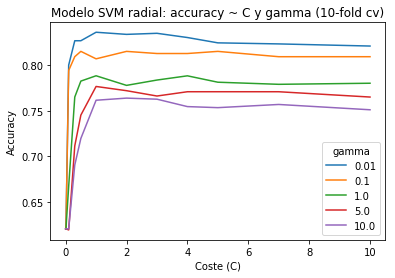

Valor de coste y gamma óptimos: {'C': 1, 'gamma': 0.01} 
Accuracy asociado +- std: 0.836 +- 0.041


In [29]:
# Pivotamos el df para obtener los datos en tres columnas: C, accuracy con degree2 y accuracy con degree3
df_resultados_cv.pivot(index = 'C', columns = 'gamma', values = 'mean_accuracy').plot()
plt.xlabel('Coste (C)')
plt.ylabel('Accuracy')
plt.title('Modelo SVM radial: accuracy ~ C y gamma (10-fold cv)')
plt.show()

# Mejores hiperparametros sobre los datos hold-out
print('Valor de coste y gamma óptimos:', busqueda_grid.best_params_,
     '\nAccuracy asociado +- std:', round(busqueda_grid.cv_results_['mean_test_accuracy'][busqueda_grid.best_index_],3),
     '+-', round(busqueda_grid.cv_results_['std_test_accuracy'][busqueda_grid.best_index_],3))

In [30]:
# Ajustamos el modelo SVM lineal usando el valor de coste óptimo obtenido en cv
modelo_svmR = svm.SVC(kernel = 'rbf', 
                      C = busqueda_grid.best_params_.get('C'), #C=1
                      degree = busqueda_grid.best_params_.get('gamma'), #degree=0.01
                      random_state = 0) # semilla
                     
# Entrenamos el modelo con los datos de entrenamiento 
modelo_svmR.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=0.01, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [31]:
# Nº de vectores soporte para cada clase de la variable respuesta
print(modelo_svmR.n_support_)

[201 196]


### Evaluación

Métricas en test:
               precision    recall  f1-score   support

          CH       0.83      0.89      0.86       122
          MM       0.83      0.76      0.80        92

    accuracy                           0.83       214
   macro avg       0.83      0.82      0.83       214
weighted avg       0.83      0.83      0.83       214



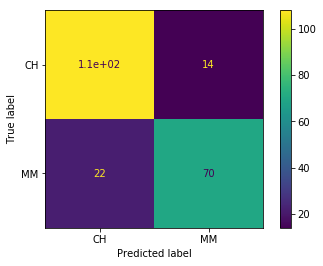

In [32]:
# TEST

# Obtenemos las predicciones del modelo sobre los datos de test
y_pred = modelo_svmR.predict(X_test)

# Metricas
print('Métricas en test:\n', classification_report(y_test, y_pred))

# Matriz de confusion (0=CH, 1=MM)
plot_confusion_matrix(modelo_svmR, X_test, y_test)

[![CC BY 4.0][cc-by-shield]][cc-by]

This work by Cristina Gil Martínez is licensed under a [Creative Commons Attribution 4.0 International License][cc-by].

[![CC BY 4.0][cc-by-image]][cc-by]

[cc-by]: http://creativecommons.org/licenses/by/4.0/
[cc-by-image]: https://i.creativecommons.org/l/by/4.0/88x31.png
[cc-by-shield]: https://img.shields.io/badge/License-CC%20BY%204.0-lightgrey.svg